# problem_statement

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [1]:
#Import Liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold,LeaveOneOut, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Dataset
df=pd.read_csv(r'C:\Users\admin\Documents\Data Science\Assignment\KNN\glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
#Check the size of data
df.shape

(214, 10)

In [4]:
#check the data type:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
#Desciptive Statestics
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Exploratory data analysis (EDA)

In [6]:
#Check for duplicated:
df.duplicated().sum()

1

In [7]:
#Print the duplicated values
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [8]:
#Drop Duplicated records
df.drop_duplicates(inplace=True)

In [9]:
#Check for duplicated:
df.duplicated().sum()

0

In [10]:
#Check for null values:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.dpi']= 250

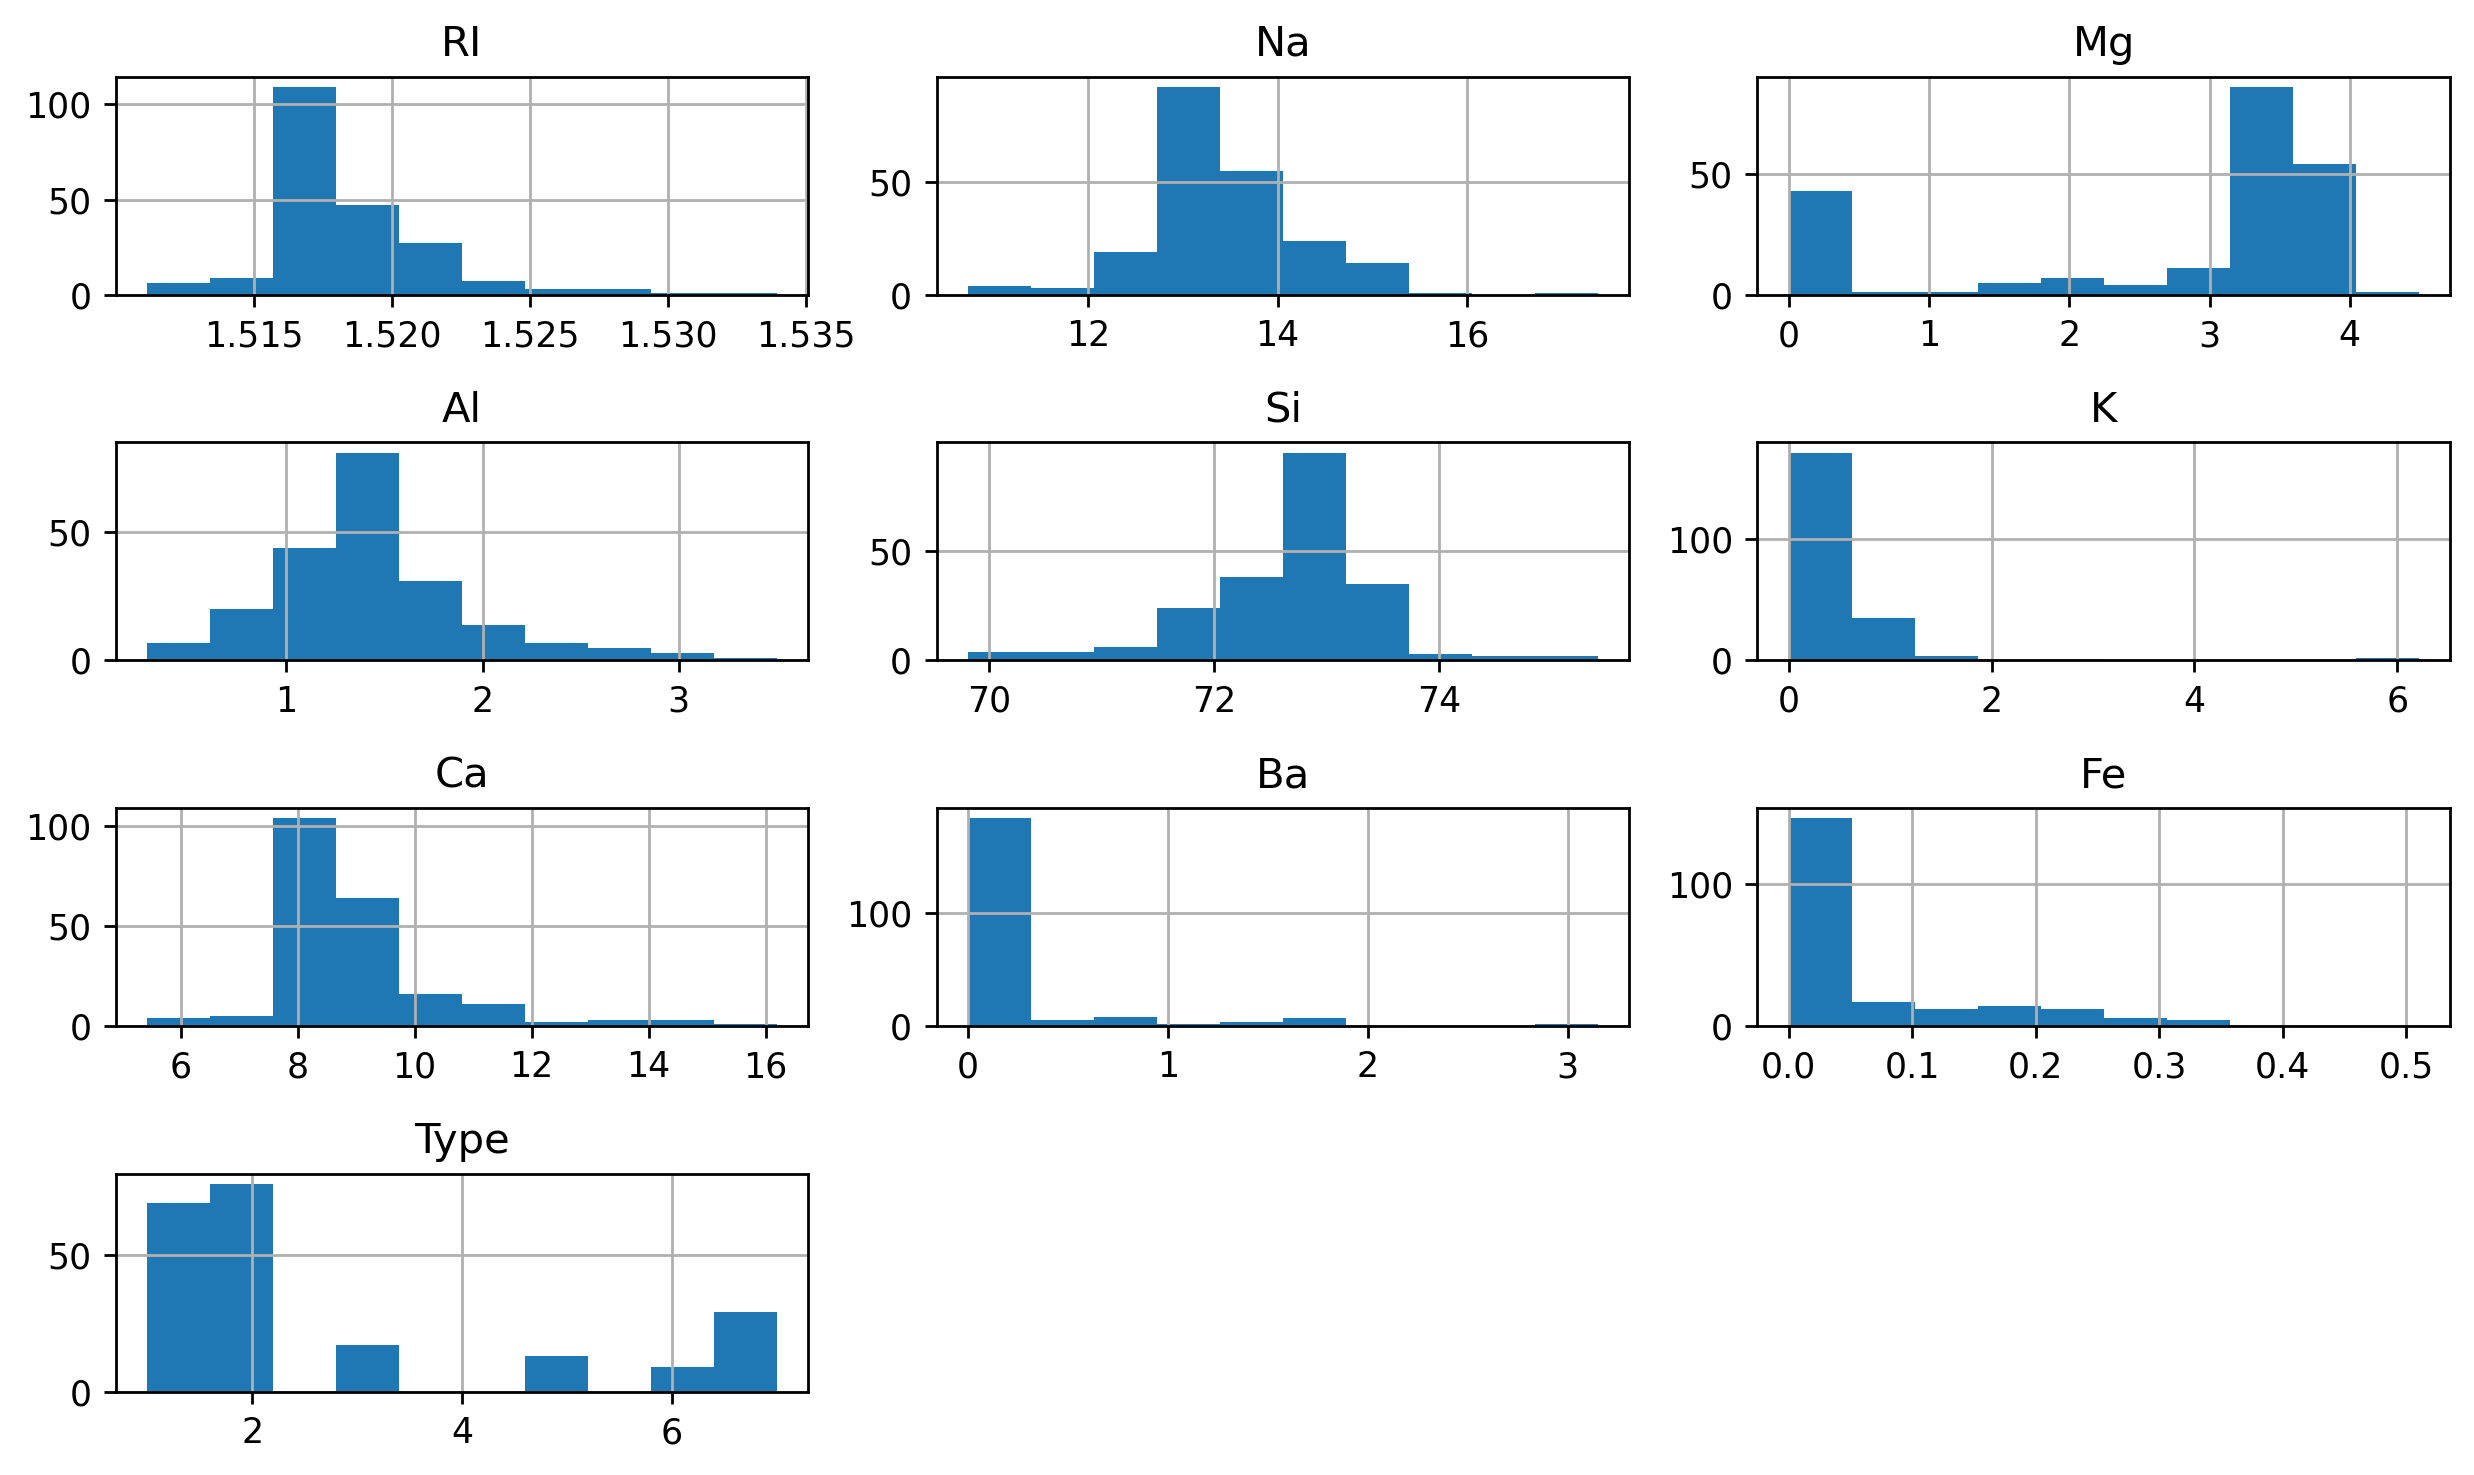

In [12]:
#Check the destribution of data
df.hist()
plt.tight_layout()

- more of the data is seems to be skewed.
- that means data have a outliers

In [13]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

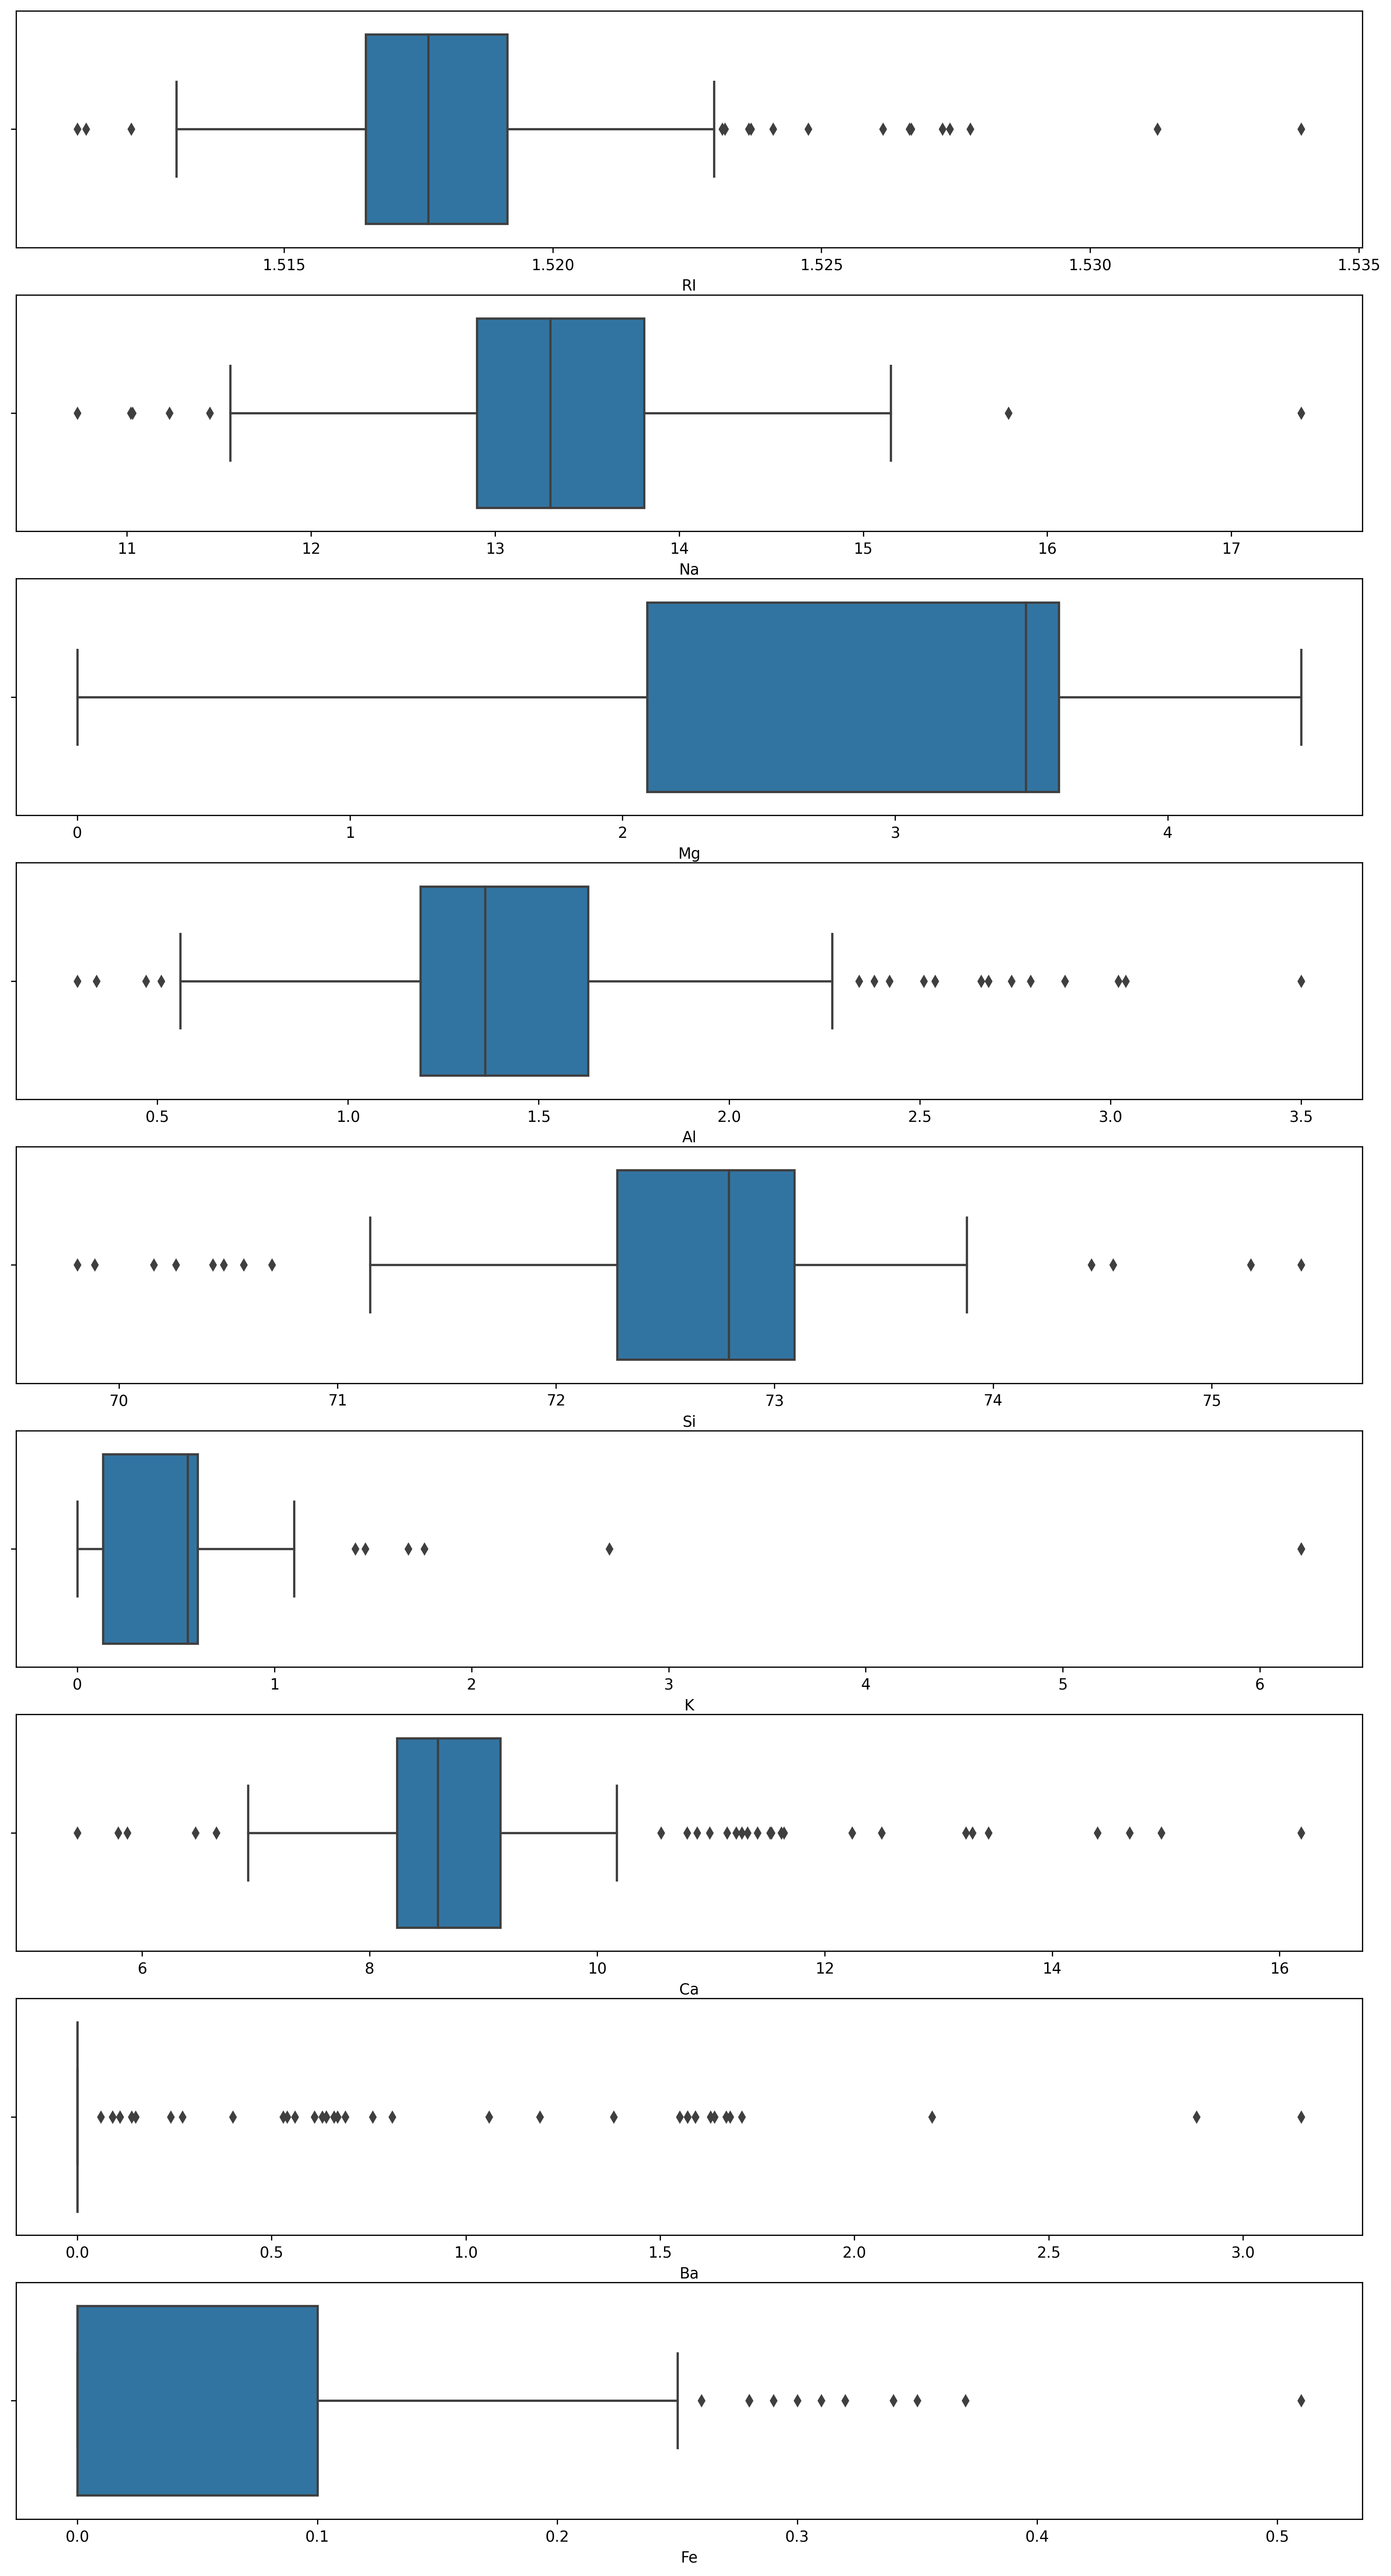

<Figure size 2500x1500 with 0 Axes>

In [15]:
ot_df=df.copy()
fig, axes=plt.subplots(9,1, figsize=(16,30))
sns.boxplot(x='RI', data=ot_df, ax=axes[0])
sns.boxplot(x='Na', data=ot_df, ax=axes[1])
sns.boxplot(x='Mg', data=ot_df, ax=axes[2])
sns.boxplot(x='Al', data=ot_df, ax=axes[3])
sns.boxplot(x='Si', data=ot_df, ax=axes[4])
sns.boxplot(x='K', data=ot_df, ax=axes[5])
sns.boxplot(x='Ca', data=ot_df, ax=axes[6])
sns.boxplot(x='Ba', data=ot_df, ax=axes[7])
sns.boxplot(x='Fe', data=ot_df, ax=axes[8])
plt.show()
plt.tight_layout()

# Feature Engineering
- Feature Scaling

In [16]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
x=df.drop(columns='Type')
y=df['Type']

In [18]:
#perform a scaling on independent variable:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

# Model Building

### Tain_Test_Split Model Validation Technique

In [19]:
#Split a data
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [20]:
#Build a model
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.71      0.83      0.77        18
           2       0.71      0.77      0.74        13
           3       0.00      0.00      0.00         6
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.72        43
   macro avg       0.65      0.77      0.70        43
weighted avg       0.64      0.72      0.68        43



In [21]:
print(knn.score(xtrain,ytrain))
print(knn.score(xtest,ytest))

0.7470588235294118
0.7209302325581395


### Leave_One_Out_Technique

In [22]:
#As the dataset is very small in size so we will use the leave one out cross validation
lo=LeaveOneOut()
scores=cross_val_score(knn,x,y,cv=lo)
scores

array([1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
scores.mean()

0.6572769953051644

- As we can see accuracy is very less, so lets try KFold cross validation

## KFold Cross Validation

In [24]:
kf=KFold(n_splits=10)
score=cross_val_score(knn,x,y,cv=kf)
score

array([0.68181818, 0.81818182, 0.72727273, 0.76190476, 0.47619048,
       0.42857143, 0.47619048, 0.        , 0.19047619, 0.95238095])

In [25]:
score.mean()

0.5512987012987014

- Accuracy by KFold cross validation is less as compared to leave one out cross validation
- so we will go through the train_test_split 

# Grid Search for Algorithm Tuning

In [26]:
acc=[]

for i in range(2,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred1=knn.predict(xtest)
    acc.append(knn.score(xtest,ytest))

In [27]:
acc

[0.7209302325581395,
 0.7441860465116279,
 0.7441860465116279,
 0.7209302325581395,
 0.7441860465116279,
 0.6976744186046512,
 0.6976744186046512,
 0.6744186046511628,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7441860465116279,
 0.7209302325581395,
 0.7441860465116279,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395]

In [28]:
list(range(2,20))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

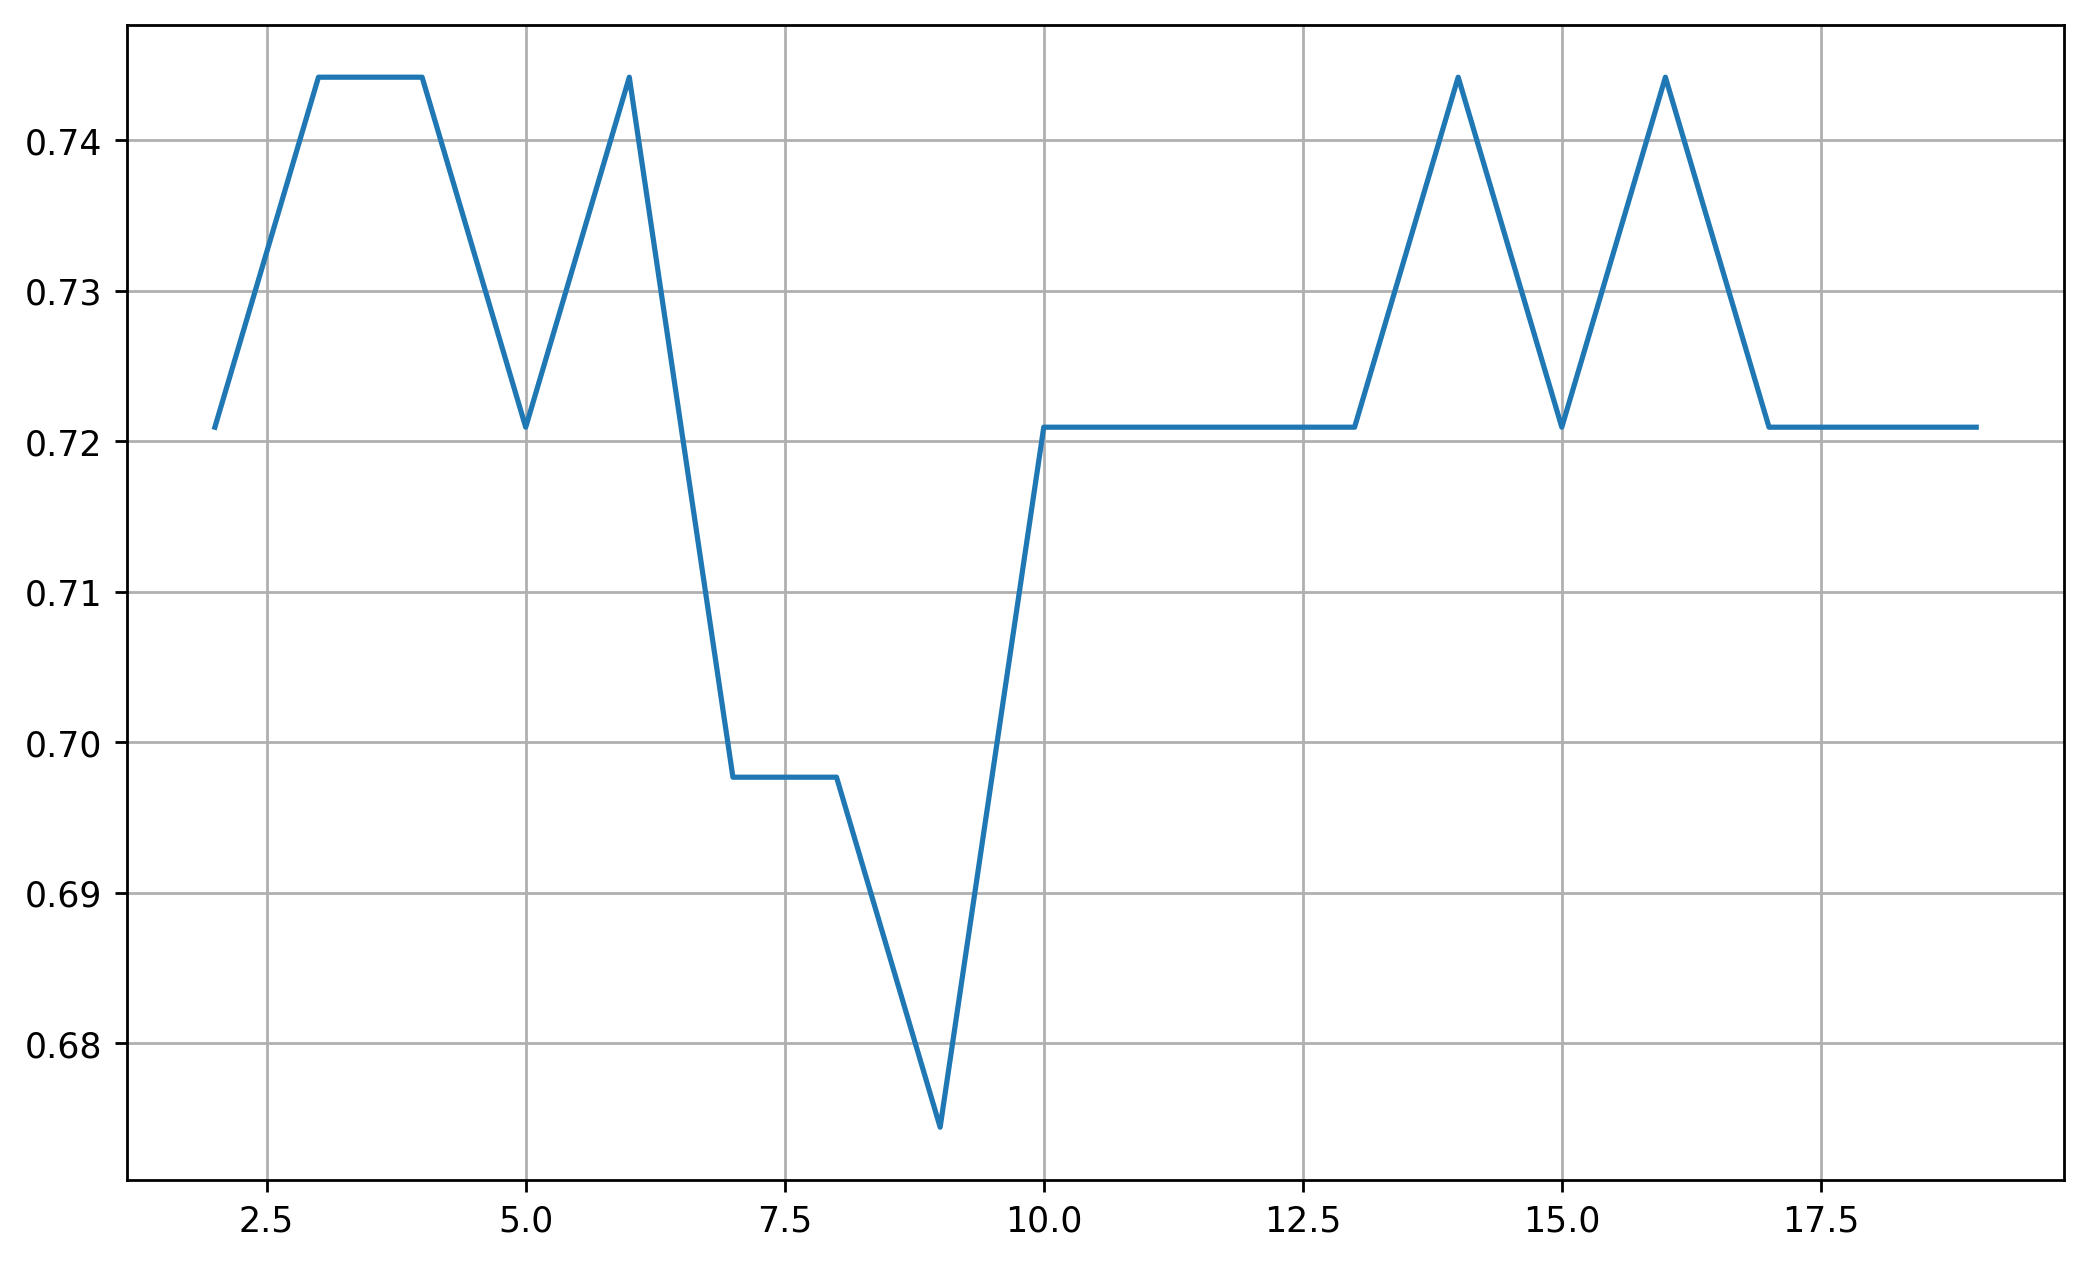

In [29]:
plt.plot(range(2,20),acc)
plt.grid()

- so we can see from above graph accuracy is high(74%) at n_neighbors=3,4,14 and 16.
- so we will create a model with n_neighbors=3

In [30]:
#Build a final model
model=KNeighborsClassifier(n_neighbors=4)
model.fit(xtrain,ytrain)
ypred_1=model.predict(xtest)
print(classification_report(ytest,ypred_1))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83        18
           2       0.67      0.77      0.71        13
           3       0.50      0.17      0.25         6
           5       0.33      1.00      0.50         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.74        43
   macro avg       0.72      0.79      0.72        43
weighted avg       0.74      0.74      0.73        43



In [31]:
print(model.score(xtrain,ytrain))
print(model.score(xtest,ytest))

0.7823529411764706
0.7441860465116279


# Hyperparameter Tuning for model

In [32]:
trainac = []
testac = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

In [33]:
trainac

[1.0,
 0.8,
 0.8176470588235294,
 0.7823529411764706,
 0.7470588235294118,
 0.7411764705882353,
 0.6882352941176471,
 0.7058823529411765,
 0.6882352941176471,
 0.6823529411764706,
 0.7,
 0.6882352941176471,
 0.6470588235294118,
 0.6411764705882353,
 0.6470588235294118,
 0.6235294117647059,
 0.6294117647058823,
 0.6058823529411764,
 0.6470588235294118,
 0.6705882352941176]

In [34]:
testac

[0.7674418604651163,
 0.7209302325581395,
 0.7441860465116279,
 0.7441860465116279,
 0.7209302325581395,
 0.7441860465116279,
 0.6976744186046512,
 0.6976744186046512,
 0.6744186046511628,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7441860465116279,
 0.7209302325581395,
 0.7441860465116279,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.6744186046511628]

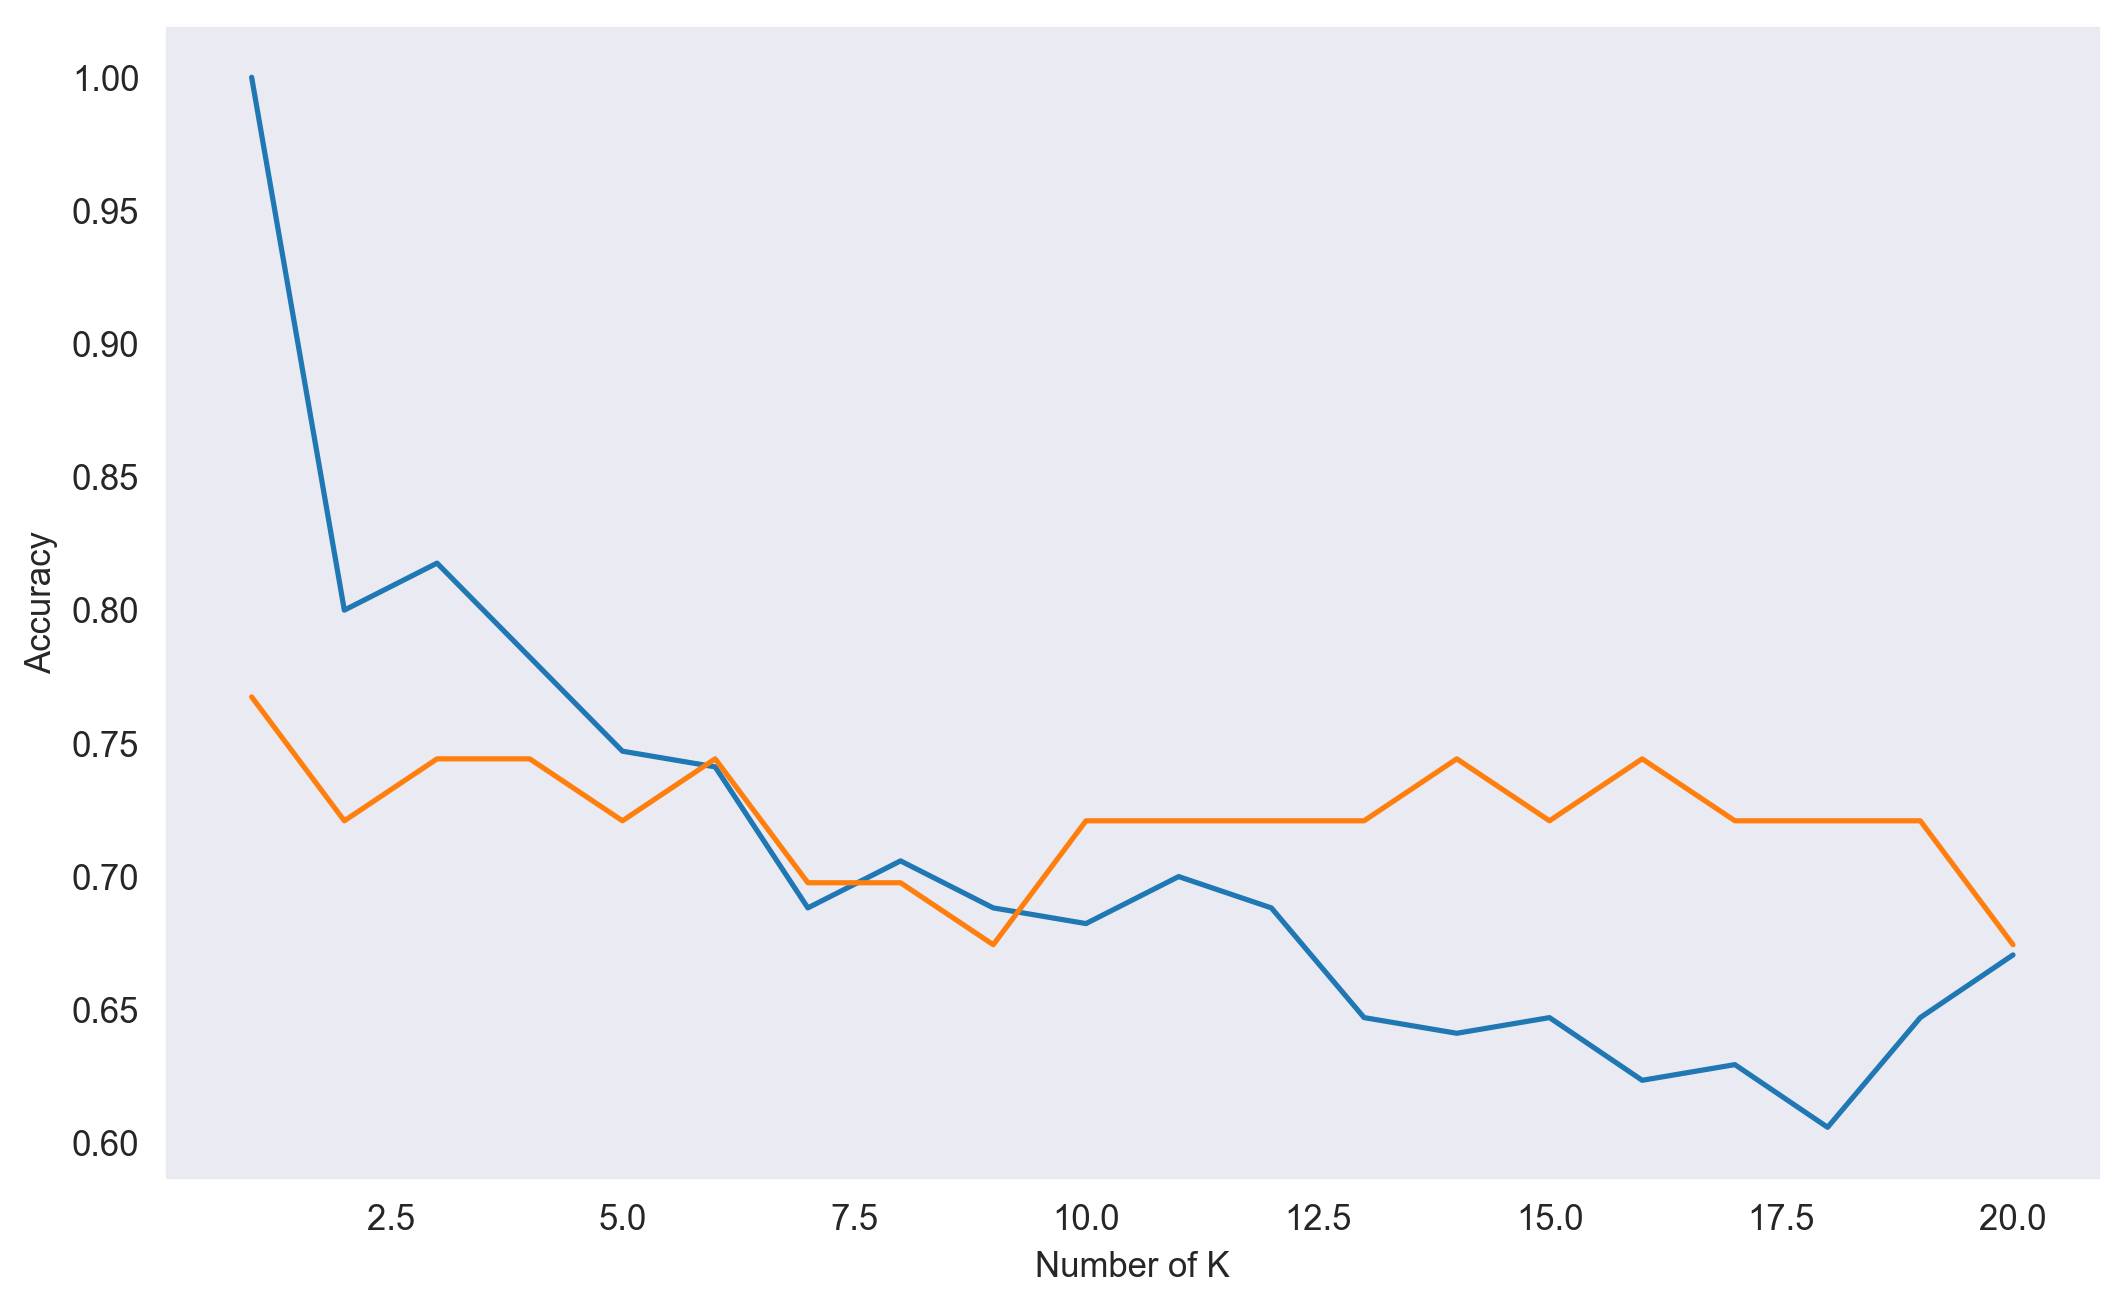

In [35]:
sns.set_style('darkgrid')

plt.plot(range(1,21),trainac)
plt.plot(range(1,21), testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

In [36]:
#final Build a final model
final_model=KNeighborsClassifier(n_neighbors=6)
final_model.fit(xtrain,ytrain)
ypred_11=final_model.predict(xtest)
print(classification_report(ytest,ypred_11))
print(final_model.score(xtrain,ytrain))
print(final_model.score(xtest,ytest))

              precision    recall  f1-score   support

           1       0.79      0.83      0.81        18
           2       0.67      0.77      0.71        13
           3       0.50      0.17      0.25         6
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.74        43
   macro avg       0.74      0.79      0.74        43
weighted avg       0.73      0.74      0.72        43

0.7411764705882353
0.7441860465116279


- Now we get the generised model with accurancy 74%

# Find out Mamimum Accuracy for KFold technique at what n_neighbors

In [38]:
k_range = range(1, 57)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x,y, cv=kf)
    k_scores.append(scores.mean())

In [39]:
k_scores

[0.5623376623376624,
 0.5833333333333334,
 0.5608225108225109,
 0.5510822510822512,
 0.5512987012987014,
 0.4372294372294373,
 0.41861471861471855,
 0.427922077922078,
 0.42878787878787883,
 0.4235930735930736,
 0.4145021645021645,
 0.4240259740259741,
 0.4099567099567099,
 0.41926406926406923,
 0.40064935064935064,
 0.39588744588744584,
 0.37748917748917743,
 0.3913419913419913,
 0.3816017316017316,
 0.3677489177489177,
 0.3677489177489177,
 0.3491341991341991,
 0.3489177489177489,
 0.3448051948051948,
 0.3354978354978355,
 0.33116883116883117,
 0.29329004329004327,
 0.3119047619047619,
 0.2844155844155844,
 0.261038961038961,
 0.24242424242424243,
 0.23787878787878788,
 0.23809523809523808,
 0.24242424242424243,
 0.2331168831168831,
 0.21428571428571427,
 0.22835497835497837,
 0.21406926406926408,
 0.21428571428571427,
 0.20497835497835498,
 0.21904761904761902,
 0.21450216450216447,
 0.21406926406926408,
 0.20454545454545453,
 0.20454545454545453,
 0.19545454545454546,
 0.1677489177

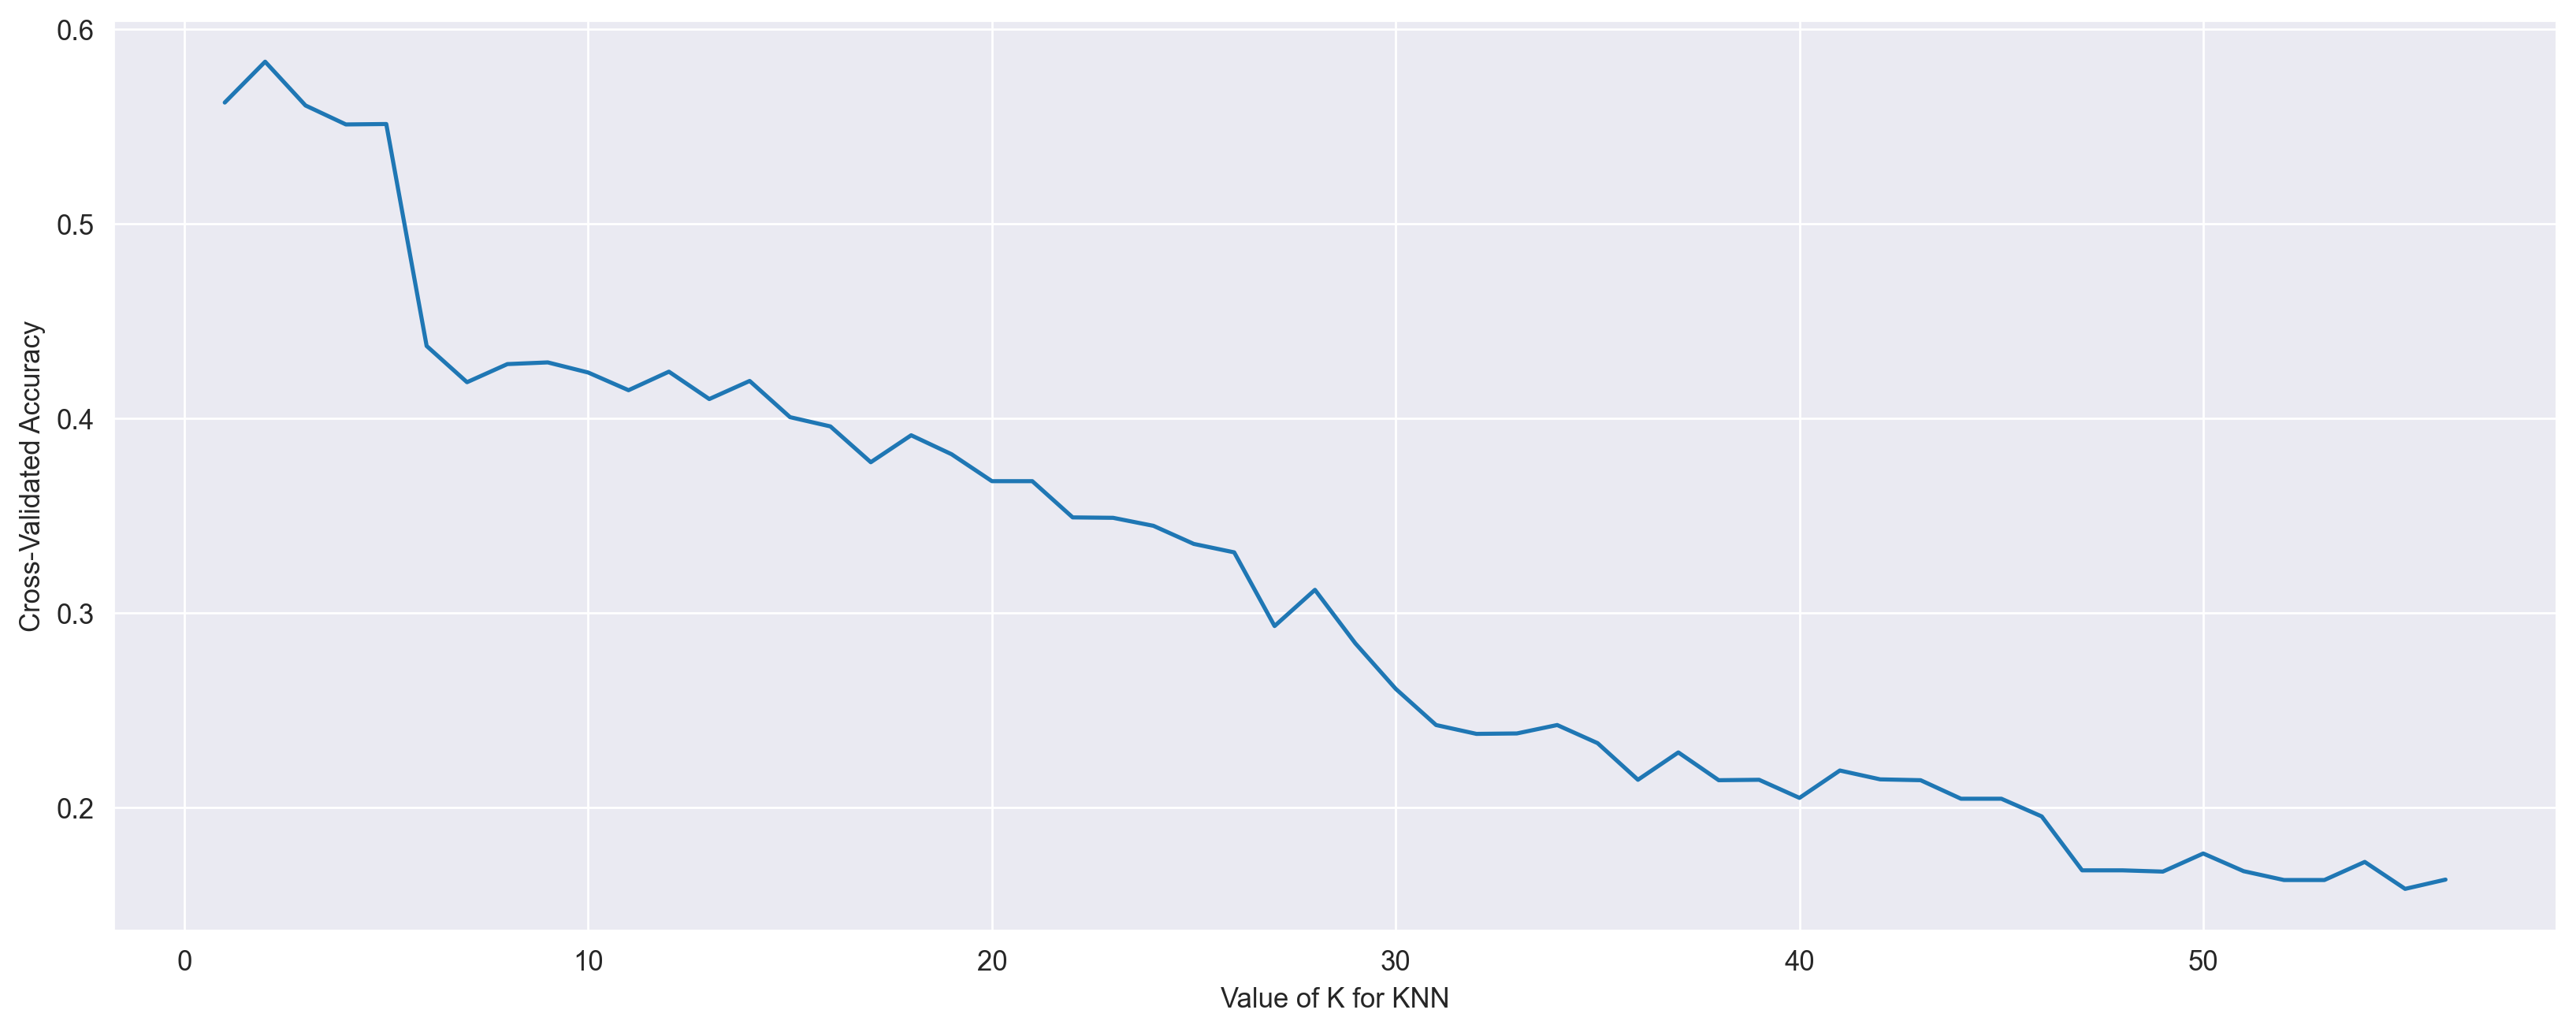

In [40]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Mamimum Accuracy (58%) for Kfold technique at k=2 n_neighbors

# Find out Mamimum Accuracy for Leave One Out technique at what n_neighbors

In [41]:
k_range = range(1, 57)
lo_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x,y, cv=lo)
    lo_scores.append(scores.mean())

In [43]:
lo_scores

[0.6948356807511737,
 0.7136150234741784,
 0.7183098591549296,
 0.676056338028169,
 0.6572769953051644,
 0.6431924882629108,
 0.6384976525821596,
 0.6384976525821596,
 0.6525821596244131,
 0.6525821596244131,
 0.6384976525821596,
 0.6572769953051644,
 0.6244131455399061,
 0.6431924882629108,
 0.6291079812206573,
 0.6291079812206573,
 0.6103286384976526,
 0.6244131455399061,
 0.6150234741784038,
 0.6197183098591549,
 0.6197183098591549,
 0.5915492957746479,
 0.6009389671361502,
 0.6103286384976526,
 0.6103286384976526,
 0.6150234741784038,
 0.6103286384976526,
 0.6009389671361502,
 0.6009389671361502,
 0.596244131455399,
 0.6009389671361502,
 0.5868544600938967,
 0.6056338028169014,
 0.5868544600938967,
 0.5727699530516432,
 0.568075117370892,
 0.5774647887323944,
 0.5915492957746479,
 0.5868544600938967,
 0.596244131455399,
 0.5821596244131455,
 0.5774647887323944,
 0.5868544600938967,
 0.5868544600938967,
 0.5868544600938967,
 0.5915492957746479,
 0.5915492957746479,
 0.59154929577464

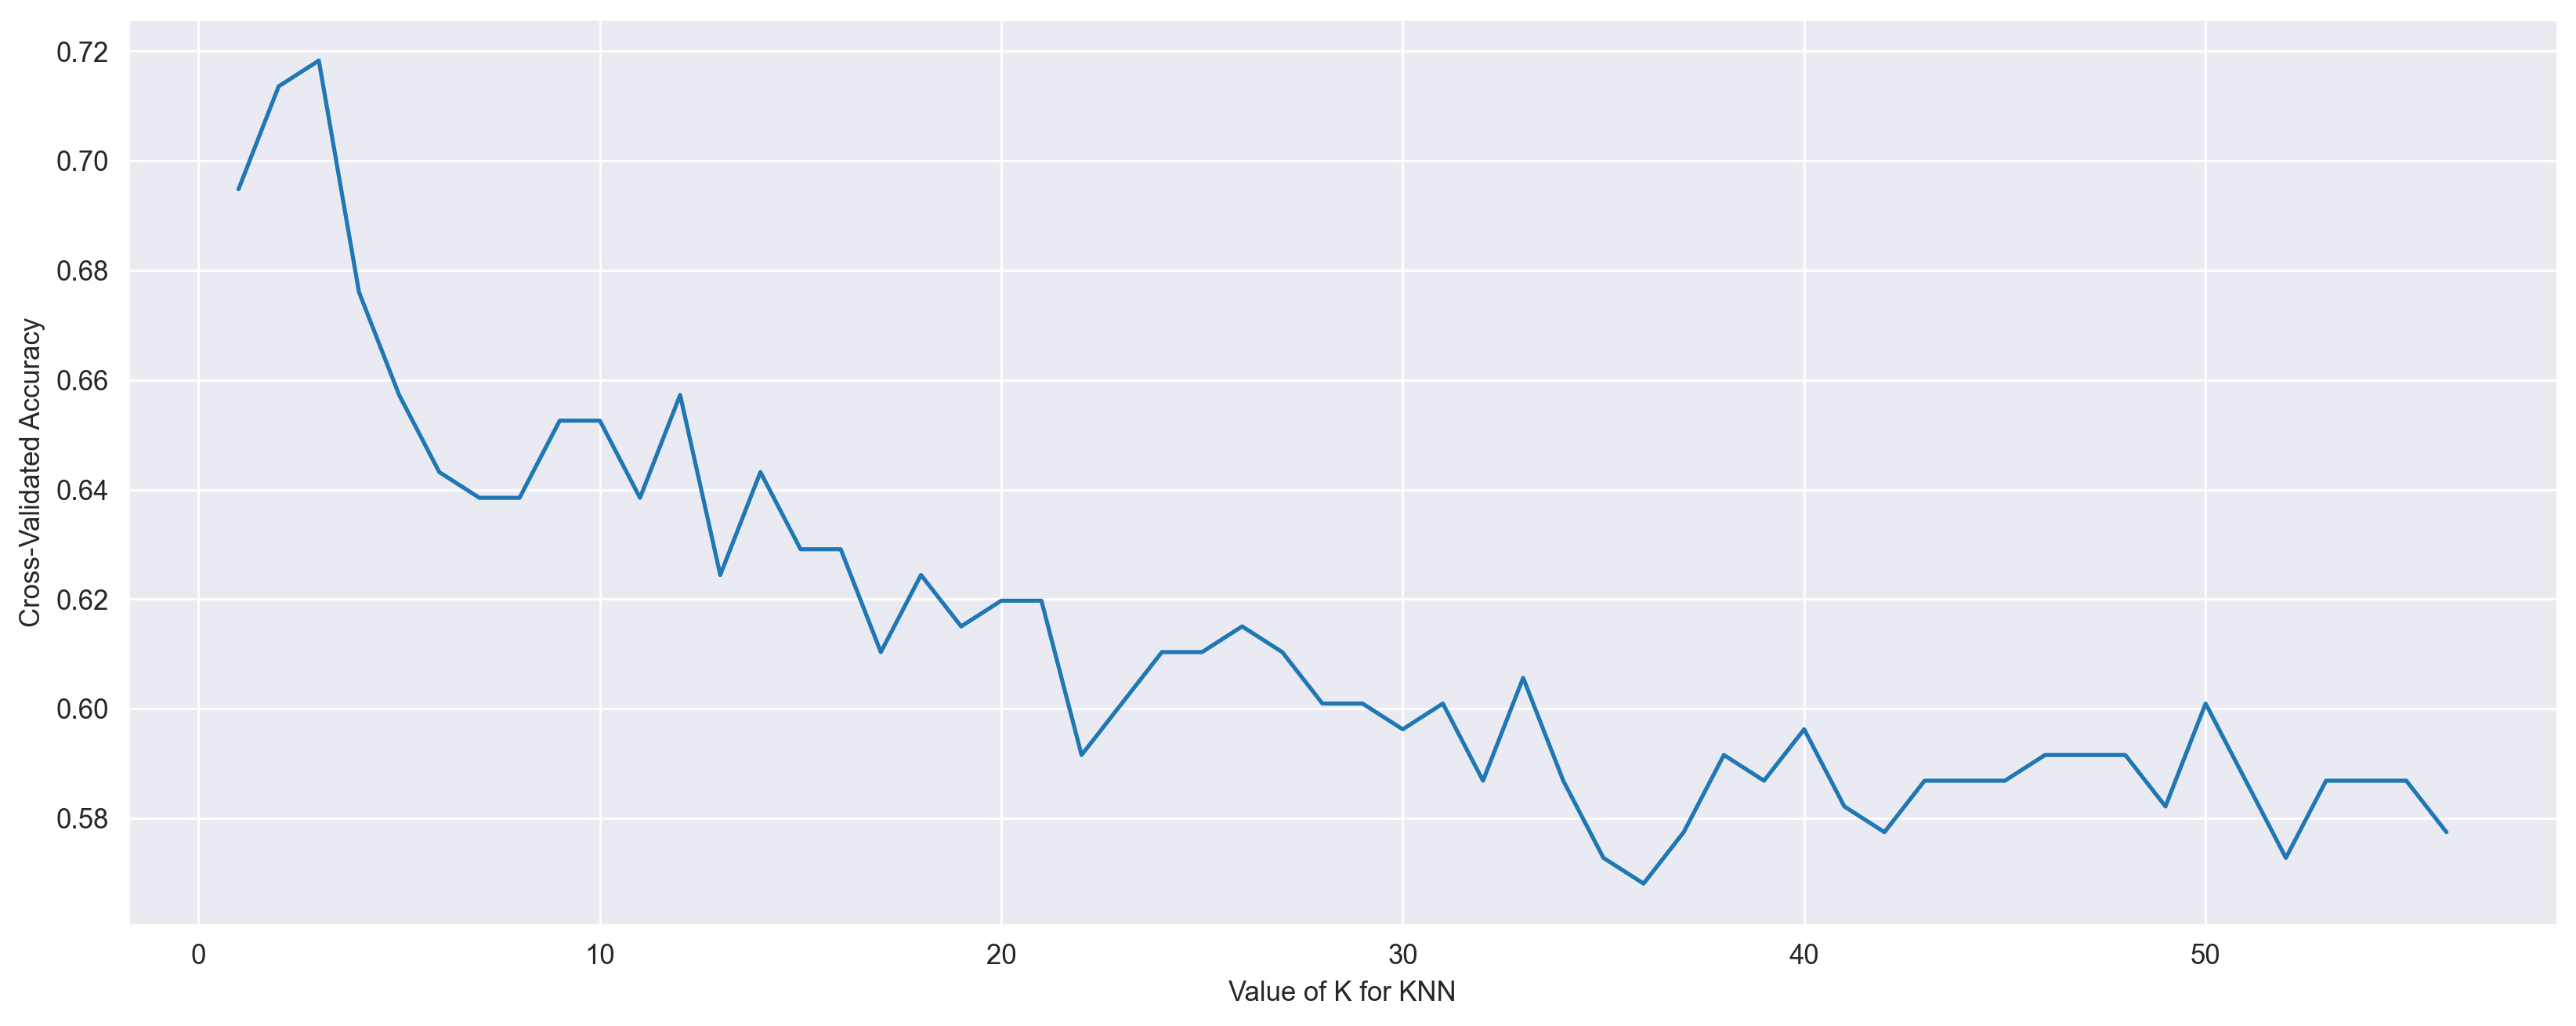

In [42]:
plt.figure(figsize=(16,6))
plt.plot(k_range, lo_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Mamimum Accuracy(71%) for leave one out technique at k=3 n_neighbors

# So we get the maximum accuracy=74% with train test split validation technique with generaised model, so we will final that final model.